# Exercise 4 : Multi-layer Networks with Keras

### CIFAR-10

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import numpy as np

Load Cifar-10 dataset

In [ ]:
((trainX, trainY), (testX, testY)) = cifar10.load_data()

Modify data to train in MLP model
* Change value range from 0 to 1
* Change data shape to one dimension

In [ ]:
trainX.shape, trainX.min(), trainX.max()

((50000, 32, 32, 3), 0, 255)

In [ ]:
trainX = trainX / 255.0
testX = testX / 255.0

In [ ]:
trainX = trainX.reshape(-1, 32*32*3)
testX = testX.reshape(-1, 32*32*3)
trainX.shape, trainX.min(), trainX.max()

((50000, 3072), 0.0, 1.0)

Change label to one-hot encoder

In [ ]:
trainY[:3]

array([[6],
       [9],
       [9]], dtype=uint8)

In [ ]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [ ]:
trainY[:3]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer",
    "dog", "frog", "horse", "ship", "truck"]

Define the 3072-1024-512-10 architecture using Keras

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(1024, input_shape = (3072,), activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              11264     
_________________________________________________________________
dense_4 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 4,217,876
Trainable params: 4,217,876
Non-trainable params: 0
______________________________________________

Train the model usign SGD

In [ ]:
sgd = SGD(0.01)    # 0.01은 크기
model.compile(loss = 'categorical_crossentropy', optimizer = 'sgd', metrics = ['accuracy'])

In [ ]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=20, batch_size=128, verbose=1)

Epoch 1/20
391/391 [==============================] - 4s 9ms/step - loss: 1.7378 - accuracy: 0.3811 - val_loss: 1.7411 - val_accuracy: 0.3814
Epoch 2/20
391/391 [==============================] - 4s 9ms/step - loss: 1.7350 - accuracy: 0.3805 - val_loss: 1.7427 - val_accuracy: 0.3789
Epoch 3/20
391/391 [==============================] - 4s 9ms/step - loss: 1.7310 - accuracy: 0.3836 - val_loss: 1.7247 - val_accuracy: 0.3860
Epoch 4/20
391/391 [==============================] - 4s 9ms/step - loss: 1.7276 - accuracy: 0.3846 - val_loss: 1.7241 - val_accuracy: 0.3860
Epoch 5/20
391/391 [==============================] - 4s 9ms/step - loss: 1.7245 - accuracy: 0.3850 - val_loss: 1.7295 - val_accuracy: 0.3815
Epoch 6/20
391/391 [==============================] - 4s 10ms/step - loss: 1.7217 - accuracy: 0.3859 - val_loss: 1.7178 - val_accuracy: 0.3906
Epoch 7/20
391/391 [==============================] - 4s 10ms/step - loss: 1.7190 - accuracy: 0.3874 - val_loss: 1.7144 - val_accuracy: 0.3909
Epoc

Evaluate the trained network

In [ ]:
model.evaluate(testX, testY, batch_size = 128)

79/79 [==============================] - 0s 6ms/step - loss: 1.6871 - accuracy: 0.3990


[1.6870869398117065, 0.39899998903274536]

In [ ]:
predictions = model.predict(testX, batch_size = 128)


Use `classification_report` to measure the performance of your model.

In [ ]:
print(classification_report(testY.argmax(axis=1),
                            predictions.argmax(axis=1), 
                            target_names=labelNames))

              precision    recall  f1-score   support

    airplane       0.50      0.42      0.46      1000
  automobile       0.47      0.54      0.50      1000
        bird       0.24      0.12      0.16      1000
         cat       0.26      0.16      0.20      1000
        deer       0.30      0.42      0.35      1000
         dog       0.38      0.32      0.35      1000
        frog       0.36      0.61      0.45      1000
       horse       0.48      0.40      0.43      1000
        ship       0.46      0.57      0.51      1000
       truck       0.50      0.42      0.46      1000

    accuracy                           0.40     10000
   macro avg       0.40      0.40      0.39     10000
weighted avg       0.40      0.40      0.39     10000



Plot the training loss and accuracy

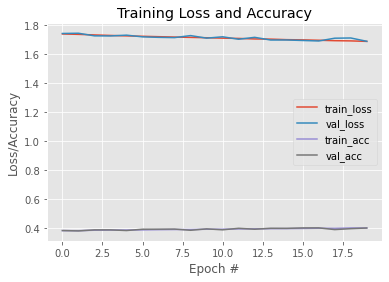

In [ ]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 20), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 20), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 20), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 20), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()